In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, multilabel_confusion_matrix,
    hamming_loss, roc_auc_score, roc_curve, auc
)
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import gdown

In [2]:
# https://drive.google.com/file/d/1QGEAr4rLVhDn6jc6XlknVCNQGshA--LK/view?usp=sharing
gdown.download('https://drive.google.com/uc?id=1QGEAr4rLVhDn6jc6XlknVCNQGshA--LK',
               '07_predicted_labels_all_emails.csv', quiet=False)
# emails_df = pd.read_csv('../data/07_predicted_labels_all_emails.csv')
emails_df = pd.read_csv('07_predicted_labels_all_emails.csv')
emails_df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1QGEAr4rLVhDn6jc6XlknVCNQGshA--LK
From (redirected): https://drive.google.com/uc?id=1QGEAr4rLVhDn6jc6XlknVCNQGshA--LK&confirm=t&uuid=4268da93-eda0-4d0a-8a58-5770425885bc
To: /Users/pkchoy/code/data_science_bootcamp/predictor/notebooks/07_predicted_labels_all_emails.csv
 25%|██▌       | 246M/971M [00:13<00:38, 18.7MB/s] 

KeyboardInterrupt: 

 25%|██▌       | 247M/971M [00:30<00:38, 18.7MB/s]

## Train a XGBoost Classifier

In [ ]:
emails_df['msg_embeddings'] = emails_df['msg_embeddings'].apply(ast.literal_eval)

In [ ]:
X = np.stack(emails_df['msg_embeddings'].values)
Y = emails_df[['D', 'I', 'S', 'C']]
print(X.shape, Y.shape)
type(X)

(62054, 768) (62054, 4)


numpy.ndarray

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

In [ ]:
xgb_model = MultiOutputClassifier(XGBClassifier(
    objective='binary:logistic',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=1,
))

In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

xgb_model.fit(X_train, Y_train, verbose=True)

X_train shape: (49643, 768)
Y_train shape: (49643, 4)


/Users/pkchoy/code/data_science_bootcamp/predictor-with-files/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:47:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pkchoy/code/data_science_bootcamp/predictor-with-files/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:47:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pkchoy/code/data_science_bootcamp/predictor-with-files/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:48:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/pkchoy/code/data_science_bootcamp/predictor-with-files/.venv/lib/python3.12

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=500, n_jobs=-1,
                                              num_parallel_tree=None, ...))

In [ ]:
joblib.dump(xgb_model, '../models/xgb_model.pkl')
joblib.dump(xgb_model, '../models/xgb_model.joblib')

['../models/xgb_model.joblib']

## Evaluate the Classifier

In [ ]:
Y_pred = xgb_model.predict(X_test)
print(classification_report(Y_test, Y_pred, target_names=['D', 'I', 'S', 'C']))

              precision    recall  f1-score   support

           D       0.88      0.86      0.87      4682
           I       0.89      0.88      0.88      5879
           S       0.90      0.93      0.92      8067
           C       0.91      0.93      0.92      7064

   micro avg       0.90      0.91      0.90     25692
   macro avg       0.90      0.90      0.90     25692
weighted avg       0.90      0.91      0.90     25692
 samples avg       0.91      0.92      0.90     25692



/Users/pkchoy/code/data_science_bootcamp/predictor-with-files/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


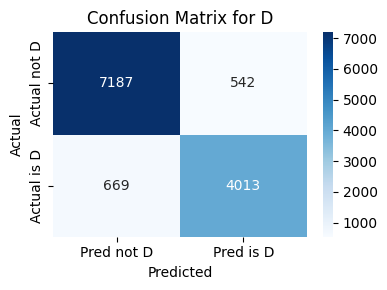

<Figure size 640x480 with 0 Axes>

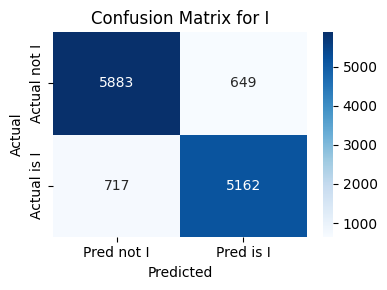

<Figure size 640x480 with 0 Axes>

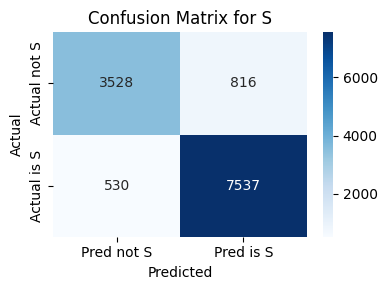

<Figure size 640x480 with 0 Axes>

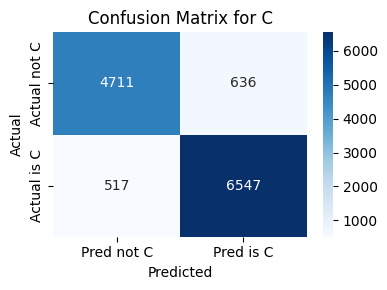

<Figure size 640x480 with 0 Axes>

In [ ]:
disc_labels = ['D', 'I', 'S', 'C']
conf_matrices = multilabel_confusion_matrix(Y_test, Y_pred)

for i, label in enumerate(disc_labels):
    cm = conf_matrices[i]
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=[f"Pred not {label}", f"Pred is {label}"],
                yticklabels=[f"Actual not {label}", f"Actual is {label}"])
    plt.title(f"Confusion Matrix for {label}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    plt.savefig(f'../figures/xgb_confusion_matrix_{label}.png')

In [ ]:
h1 = hamming_loss(Y_test, Y_pred)
print(f"Hamming Loss: {h1:.4f}")

Hamming Loss: 0.1022


In [ ]:
Y_probi = xgb_model.predict_proba(X_test)
# print(Y_probi)

Y_probi_stacked = np.stack([probi[:,1] for probi in Y_probi], axis=1)
print(Y_probi_stacked.shape)

Y_test_arr = Y_test.to_numpy()

for i, label in enumerate(disc_labels):
    auc = roc_auc_score(Y_test_arr[:,i], Y_probi_stacked[:,i])
    print(f"AUC for {label}: {auc:.4f}")

(12411, 4)
AUC for D: 0.9688
AUC for I: 0.9623
AUC for S: 0.9593
AUC for C: 0.9719


In [ ]:
# plt.figure(figsize=(10, 8))

# for i, label in enumerate(disc_labels):
#     fpr, tpr, _ = roc_curve(Y_test_arr[:, i], Y_probi_stacked[:, i])
#     roc_auc = auc(fpr, tpr)

#     plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# # Plot chance line
# plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# plt.title('ROC Curves for DISC Labels')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc='lower right')
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

# plt.savefig('../figures/xgb_roc_curves.png')